<a href="https://colab.research.google.com/github/casperg92/CD_fancyplot/blob/main/Plot_CD_spectra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Make fancy plots of CD spectra
### A tool by Casper Goverde and Martin "not Steinegger" Pacesa

In [ ]:
#@title Load functions
### load dependencies
import os, sys
import csv
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import seaborn as sns
from scipy.optimize import curve_fit
from google.colab import files

!git clone https://github.com/casperg92/CD_fancyplot.git

def plot_CD(csv_file, conversion_factor, min_x, max_x, y_min, y_max, x_min_zoom=None,x_max_zoom=None,y_min_zoom=None,y_max_zoom=None, save_path=None):
    # read csv into pandas df
    df = pd.read_csv(csv_file, header=0, index_col=0)
    df = df.dropna(axis=1, how="all")
    df = df[::-1]
    
    df = df[['20','30','40','50','60','70','80','90']]
    df = df.multiply(conversion_factor)
    
    # plot
    sns.set_theme(style="ticks")
    fig, ax = plt.subplots(figsize=(16,12))
    sns.lineplot(data=df, legend = "full", ax = ax, dashes=False, palette="coolwarm")
    plt.axhline(y=0, color='k', linestyle='--')
    
    ax.set(ylabel = "MRE [deg cm2 dmol-1]", xlabel = "Wavelength [nm]")
    ax.set_xlim([min_x,max_x])
    selected_rows = df.loc[min_x+5:max_x-5]
    
    if x_min_zoom != None:
        ax2 = plt.axes([0.65, 0.638, .25, .25])
        sns.lineplot(data = df, ax = ax2, dashes=False, legend = False, palette="coolwarm")
        ax2.set_box_aspect(0.7)
        ax2.set_title('Zoom')
        ax2.set_xlim([x_min_zoom,x_max_zoom])
        ax2.set_ylim ([y_min_zoom, y_max_zoom])
        ax2.set (xlabel = None)
        ax2.set (ylabel = None)
    
    ax.set_ylim(y_min, y_max)
    
    if save_path != None:
        plt.savefig(save_path)
    plt.show()

def plot_melting(csv_file, conversion_factor, wl, y_min, y_max, measure_interval=5, fit_sigmoid=False, save_path=None):
    # read csv into pandas df
    df = pd.read_csv(csv_file, header=0, index_col=0)
    df = df.dropna(axis=1, how="all")
    df = df[::-1]
    
    df = df.multiply(conversion_factor)
    
    # plot melting correlationat 212 nm
    df2 = df.copy()
    row_220 = df.loc[wl].transpose()
    x_data = []

    for i in range(20, 20+(measure_interval*len(row_220)), measure_interval):
        x_data.append(i)
    
    sns.set_theme(style="ticks")
    fig, ax = plt.subplots(figsize=(16,12))
    sns.scatterplot(x=x_data,y = row_220, legend = False, s=60, marker="s")
    # sns.lineplot(data=row_220)
    ax.set(ylabel = f"MRE [deg cm2 dmol-1] @{wl} nm", xlabel = "Temperature [°C]")
    
    ax.set_xlim([20,90])
    ax.set_ylim([y_min, y_max])
    
    if fit_sigmoid:
        try:
            # Fit curve
            def sigmoid(x, Top, Bottom, IC50, HillSlope):
                y = Bottom + (Top-Bottom)/(1+(IC50/x)**HillSlope)
                return (y)

            p0 = [-12000, -10000, 50, 5] # this is an mandatory initial guess

            popt, pcov = curve_fit(sigmoid, x_data, row_220, p0)

            plt.plot(x_data, sigmoid(x_data, popt[0], popt[1], popt[2], popt[3]))
        except:
            popt = ['undetermined','undetermined','undetermined','undetermined']
            sns.lineplot(x=x_data, y=row_220, palette=['k'])

        print('Top:', popt[0])
        print('Bot:', popt[1])
        print('IC50:', popt[2])
        print('HillSlope:', popt[3])        
    
    if save_path != None:
        plt.savefig(save_path)

    plt.show()

fatal: destination path 'CD_fancyplot' already exists and is not an empty directory.


In [ ]:
#@title upload your csv file and hit `Runtime` -> `Run all`
#@markdown Note: the input data is in milidegrees (mdeg)

#@markdown If you want to use Mean Residue Ellipticity (MRE) check the box and fill out the following parameters:
use_mean_residue_ellipticity = True #@param {type:"boolean"}
number_of_aas = 122 #@param {type:"number"}
mass = 13.02 #@param {type:"number"}
mean_mass_per_residue = (mass*1000)/number_of_aas# [gr/mol]

cell_path_length = 0.1 #@param {type:"number"}
sample_concentration = 0.3 #@param {type:"number"}

#@markdown mass [kDa] \
#@markdown cell_path_length [cm] \
#@markdown sample concentration [g/L]

correction_factor = mean_mass_per_residue/(10*sample_concentration*cell_path_length)

if use_mean_residue_ellipticity:
  print('Convert to Mean Residue Ellipticity (MRE) with a conversion factor of:', correction_factor)
else:
  print('Not converting to Mean Residue Ellipticity, using mdeg instead')

Convert to Mean Residue Ellipticity (MRE) with a conversion factor of: 355.7377049180327


In [ ]:
#@title Upload a pdb file?
#@markdown Upload a file yourself to the '/content/csv' folder.
# Create folder for the pdbs
pred_dir = '/content/csv'
isExist = os.path.exists(pred_dir)
if not isExist:
  os.makedirs(pred_dir)

pred_dir = '/content/figures'
isExist = os.path.exists(pred_dir)
if not isExist:
  os.makedirs(pred_dir)

!cp /content/CD_fancyplot/CD_melting_example.csv /content/csv/CD_melting_example.csv

upload_file = False #@param {type:"boolean"}

%cd -q /content/csv
if upload_file:
  uploaded = files.upload()
%cd -q /content

csv_file =  "csv/CD_melting_example.csv" #@param {type:"string"}

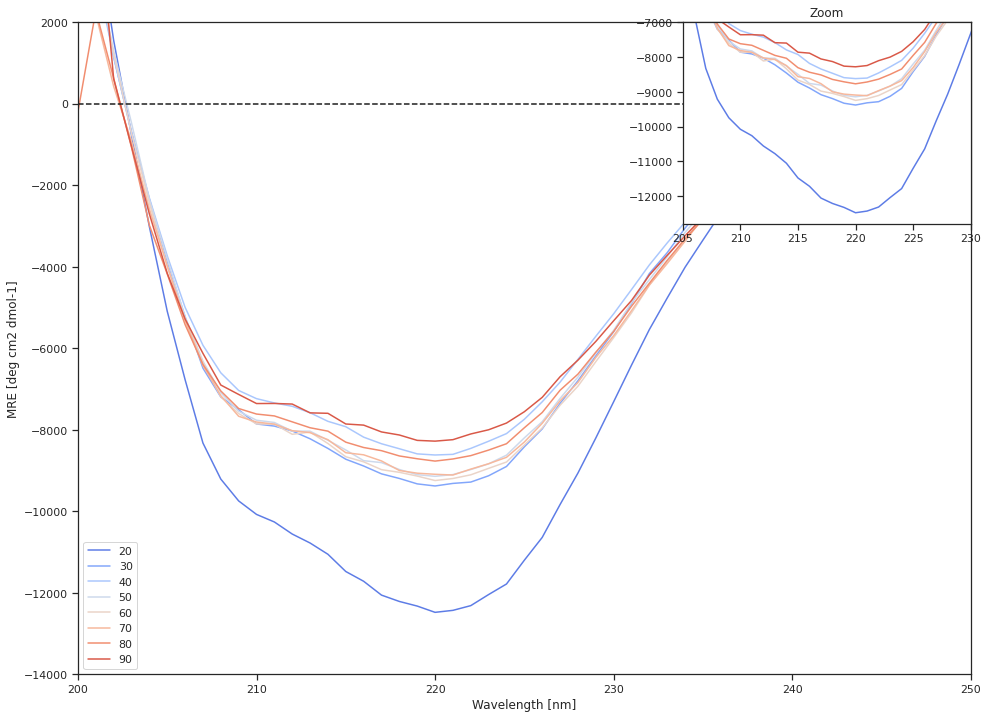

In [ ]:
#@title Plot CD spectrum
x_min = 200 #@param {type:"number"}
x_max = 250 #@param {type:"number"}
y_min = -14000 #@param {type:"number"}
y_max = 2000 #@param {type:"number"}

use_zoom = True #@param {type:"boolean"}

if use_zoom:
  x_min_zoom = 205 #@param {type:"number"}
  x_max_zoom = 230 #@param {type:"number"}
  y_min_zoom = -12800 #@param {type:"number"}
  y_max_zoom = -7000 #@param {type:"number"}
else:
  x_min_zoom = None
  x_max_zoom = None
  y_min_zoom = None
  y_max_zoom = None

save_path = '/content/figures/CD_spectrum.svg'

df = plot_CD(csv_file, correction_factor, x_min, x_max, y_min, y_max,x_min_zoom,x_max_zoom,y_min_zoom,y_max_zoom, save_path)

Top: -7809.357963044163
Bot: -10945.356735068062
IC50: 23.64712043243075
HillSlope: 10.201726122432714


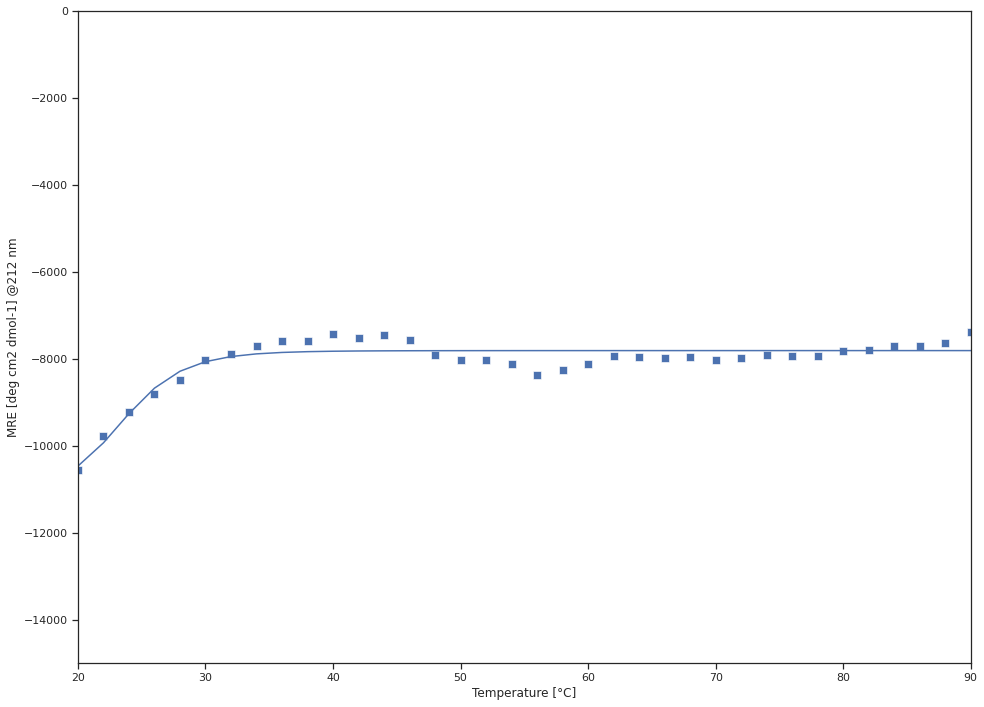

In [ ]:
#@title Plot melting curve

wavelength = 212 #@param {type:"number"}
y_min = -15000 #@param {type:"number"}
y_max = 0 #@param {type:"number"}
measure_interval = 2 #@param {type:"number"}

fit_sigmoid = True #@param {type:"boolean"}

save_path = '/content/figures/CD_melting.svg'

plot_melting(csv_file, correction_factor, wavelength, y_min, y_max, measure_interval, fit_sigmoid, save_path)